## Getting started

In [1]:
from text2brick.models import Brick, BrickRef
from text2brick.managers import SingleBrickLegoWorldManager
from text2brick.models import BrickGetterEnum
from text2brick.utils.WorldDataUtils import format_ldraw, save_ldr
from text2brick.gym import LegoEnv
from text2brick.dataset import Dataset
from text2brick.utils.ImageUtils import image_upscale

A brick type is defined by the object BrickRef defined by a file_id (id of ldraw file), a name, a color (from 0 to 15 - white) and dimension. dimension of a lego brick are defined by a height, width and depth (h, w, d) in lego unit (1u = 1 stud in the lego world)

In [2]:
brickref = BrickRef(file_id='3003.dat', name='2x2', color=15, h=1, w=2, d=2)

You can define a brick with the Brick object composed of a brick_id, brick type, x, y and z coords.

In [3]:
brick = Brick(brick_id=4, brick_ref=brickref, x=2, y=0, z=0)

In [4]:
brick

Brick(brick_id=4, x=2, y=0, z=0, brick_ref=BrickRef(file_id='3003.dat', name='2x2', color=15, h=1, w=2, d=2), connected_to=[])

You can define a Lego world with a mapping table. Each 1 is 1 lego brick stud.

In [5]:
mapping_table = [[0, 0, 0, 0, 0, 0],
                 [1, 1, 0, 0, 0, 0],
                 [1, 1, 0, 0, 0, 0],
                 [1, 1, 0, 0, 1, 1]]

You can init a lego world by creating a SingleBrickLegoWorldManager (1 type of brick only for the moment)

In [6]:
lego_world = SingleBrickLegoWorldManager(table=mapping_table, brick_ref=brickref)

Creating brick 0 at (0, 1)
Creating brick 1 at (0, 2)
Creating brick 2 at (0, 3)
Creating brick 3 at (4, 3)


In [7]:
print(lego_world.data.str_full_infos())

Lego World Bricks
id: 0 x: 0 | y: 2 | z: 0 | ID: 3003.dat | Name: 2x2 | Color: 15 | h:1 | w:2 | d:2 | Connected to: [1]
id: 1 x: 0 | y: 1 | z: 0 | ID: 3003.dat | Name: 2x2 | Color: 15 | h:1 | w:2 | d:2 | Connected to: [0, 2]
id: 2 x: 0 | y: 0 | z: 0 | ID: 3003.dat | Name: 2x2 | Color: 15 | h:1 | w:2 | d:2 | Connected to: [1]
id: 3 x: 4 | y: 0 | z: 0 | ID: 3003.dat | Name: 2x2 | Color: 15 | h:1 | w:2 | d:2 | Connected to: []


You can retrieve a block from world by ID or COORD (x, y, z)

In [8]:
brick_1 = lego_world.get_brick(identifier=0, lookup_type=BrickGetterEnum.ID)

In [9]:
brick_1

Brick(brick_id=0, x=0, y=2, z=0, brick_ref=BrickRef(file_id='3003.dat', name='2x2', color=15, h=1, w=2, d=2), connected_to=[Brick(brick_id=1, x=0, y=1, z=0, brick_ref=BrickRef(file_id='3003.dat', name='2x2', color=15, h=1, w=2, d=2), connected_to=[Brick(brick_id=0, x=0, y=2, z=0, brick_ref=BrickRef(file_id='3003.dat', name='2x2', color=15, h=1, w=2, d=2), connected_to=[...]), Brick(brick_id=2, x=0, y=0, z=0, brick_ref=BrickRef(file_id='3003.dat', name='2x2', color=15, h=1, w=2, d=2), connected_to=[Brick(brick_id=1, x=0, y=1, z=0, brick_ref=BrickRef(file_id='3003.dat', name='2x2', color=15, h=1, w=2, d=2), connected_to=[...])])])])

In [10]:
brick_2 = lego_world.get_brick(identifier=[0, 2, 0], lookup_type=BrickGetterEnum.COORDS)

In [11]:
brick_2

Brick(brick_id=0, x=0, y=2, z=0, brick_ref=BrickRef(file_id='3003.dat', name='2x2', color=15, h=1, w=2, d=2), connected_to=[Brick(brick_id=1, x=0, y=1, z=0, brick_ref=BrickRef(file_id='3003.dat', name='2x2', color=15, h=1, w=2, d=2), connected_to=[Brick(brick_id=0, x=0, y=2, z=0, brick_ref=BrickRef(file_id='3003.dat', name='2x2', color=15, h=1, w=2, d=2), connected_to=[...]), Brick(brick_id=2, x=0, y=0, z=0, brick_ref=BrickRef(file_id='3003.dat', name='2x2', color=15, h=1, w=2, d=2), connected_to=[Brick(brick_id=1, x=0, y=1, z=0, brick_ref=BrickRef(file_id='3003.dat', name='2x2', color=15, h=1, w=2, d=2), connected_to=[...])])])])

Check for valid brick id 

In [12]:
lego_world.data.valid_bricks

{0, 1, 2, 3}

In [13]:
lego_world.check_brick_validity(brick_1)

True

In [14]:
lego_world.data.valid_bricks

{0, 1, 2, 3}

You can add brick by defining one

In [15]:
lego_world.add_brick(brick)

True

In [16]:
print(lego_world.data.str_full_infos())

Lego World Bricks
id: 0 x: 0 | y: 2 | z: 0 | ID: 3003.dat | Name: 2x2 | Color: 15 | h:1 | w:2 | d:2 | Connected to: [1]
id: 1 x: 0 | y: 1 | z: 0 | ID: 3003.dat | Name: 2x2 | Color: 15 | h:1 | w:2 | d:2 | Connected to: [0, 2]
id: 2 x: 0 | y: 0 | z: 0 | ID: 3003.dat | Name: 2x2 | Color: 15 | h:1 | w:2 | d:2 | Connected to: [1]
id: 3 x: 4 | y: 0 | z: 0 | ID: 3003.dat | Name: 2x2 | Color: 15 | h:1 | w:2 | d:2 | Connected to: []
id: 4 x: 2 | y: 0 | z: 0 | ID: 3003.dat | Name: 2x2 | Color: 15 | h:1 | w:2 | d:2 | Connected to: []


or with x, y coords

In [17]:
lego_world.add_brick_from_coord(4, 1, brickref)

True

In [18]:
print(lego_world.data.str_full_infos())

Lego World Bricks
id: 0 x: 0 | y: 2 | z: 0 | ID: 3003.dat | Name: 2x2 | Color: 15 | h:1 | w:2 | d:2 | Connected to: [1]
id: 1 x: 0 | y: 1 | z: 0 | ID: 3003.dat | Name: 2x2 | Color: 15 | h:1 | w:2 | d:2 | Connected to: [0, 2]
id: 2 x: 0 | y: 0 | z: 0 | ID: 3003.dat | Name: 2x2 | Color: 15 | h:1 | w:2 | d:2 | Connected to: [1]
id: 3 x: 4 | y: 0 | z: 0 | ID: 3003.dat | Name: 2x2 | Color: 15 | h:1 | w:2 | d:2 | Connected to: []
id: 4 x: 2 | y: 0 | z: 0 | ID: 3003.dat | Name: 2x2 | Color: 15 | h:1 | w:2 | d:2 | Connected to: []
id: 5 x: 4 | y: 1 | z: 0 | ID: 3003.dat | Name: 2x2 | Color: 15 | h:1 | w:2 | d:2 | Connected to: [3]


In [19]:
lego_world.data.valid_bricks

{0, 1, 2, 3, 4, 5}

In [20]:
print(lego_world.data)

Piece Count : 6
x: 0 | y: 2 | z: 0
x: 0 | y: 1 | z: 0
x: 0 | y: 0 | z: 0
x: 4 | y: 0 | z: 0
x: 2 | y: 0 | z: 0
x: 4 | y: 1 | z: 0


You can convert back the world to mapping table

In [21]:
lego_world.recreate_table_from_world()

array([[0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 1]], dtype=uint8)

Remove a brick

In [22]:
lego_world.remove_brick(brick)

True

In [23]:
print(lego_world.data.str_full_infos())

Lego World Bricks
id: 0 x: 0 | y: 2 | z: 0 | ID: 3003.dat | Name: 2x2 | Color: 15 | h:1 | w:2 | d:2 | Connected to: [1, 1]
id: 1 x: 0 | y: 1 | z: 0 | ID: 3003.dat | Name: 2x2 | Color: 15 | h:1 | w:2 | d:2 | Connected to: [0, 2, 0, 2]
id: 2 x: 0 | y: 0 | z: 0 | ID: 3003.dat | Name: 2x2 | Color: 15 | h:1 | w:2 | d:2 | Connected to: [1, 1]
id: 3 x: 4 | y: 0 | z: 0 | ID: 3003.dat | Name: 2x2 | Color: 15 | h:1 | w:2 | d:2 | Connected to: [5]
id: 5 x: 4 | y: 1 | z: 0 | ID: 3003.dat | Name: 2x2 | Color: 15 | h:1 | w:2 | d:2 | Connected to: [3, 3]


In [24]:
lego_world.recreate_table_from_world()

array([[0, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 1],
       [1, 1, 0, 0, 1, 1]], dtype=uint8)

Save to Ldraw Format

In [25]:
world_ldraw_formatted = format_ldraw(lego_world.data)

In [26]:
world_ldraw_formatted

['1 15 0 -48 0 1 0 0 0 1 0 0 0 1 3003.dat',
 '1 15 0 -24 0 1 0 0 0 1 0 0 0 1 3003.dat',
 '1 15 0 0 0 1 0 0 0 1 0 0 0 1 3003.dat',
 '1 15 80 0 0 1 0 0 0 1 0 0 0 1 3003.dat',
 '1 15 80 -24 0 1 0 0 0 1 0 0 0 1 3003.dat']

In [27]:
save_ldr(lego_world.data, 'test_ldr')

DATASET

Load the MNIST dataset

In [28]:
dataset = Dataset()

Get samples from the dataset

Random sample

1 67048


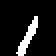

In [29]:
array, image, label, index = dataset.sample()
print(label, index)
image = image_upscale(image, 2)
image

Sample from scpecific index

7 301


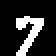

In [30]:
array, image, label, index = dataset.sample(sample_index=301)
print(label, index)
image = image_upscale(image, 2)
image

Remove rows from the top of the sample image

7 301


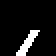

In [31]:
array, image, label, index = dataset.sample(sample_index=index, n_rows=15)
print(label, index)
image = image_upscale(image, 2)
image

Remove columns from the left side of the sample image

7 301


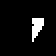

In [32]:
array, image, label, index = dataset.sample(sample_index=index, n_cols=16)
print(label, index)
image = image_upscale(image, 2)
image

Using Gym Env

The size define the x, y shape of the lego world

In [33]:
lego_world_size = 10 
lego_env = LegoEnv(lego_world_size)